# <center>Import</center>

In [1]:
import genetic_algorithms

import pandas as pd
import numpy as np
import csv
import time
import pickle
import copy
import math

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
# Make the graphs a bit prettier, and bigger
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# <center>Function definition</center>

In [2]:
def save_to_pickle_file(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_pickle_file(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
# read solution
def read_solution(filename):
    with open(filename, 'r') as sol_file:
        reader = csv.reader(sol_file, delimiter=' ', skipinitialspace=True)
        cost_sol = []
        
        for row in reader:
            cost_sol.append(int(row[2]))
            
        return cost_sol

In [ ]:
def fitness_func(bin_list, keys):
    pass

## <center>HW 4</center>

In [13]:
def measure_time4(filename, solution_file, print_out=True):
    with open(filename, 'r') as inst_file:
        reader = csv.reader(inst_file, delimiter=' ', skipinitialspace=True)
        
        solution_list = read_solution(solution_file)

        for row, solution in zip(reader, solution_list):
            n = int(row[1])
            M = int(row[2])

            pairs = {}
            for i in range(0, n*2 - 1, 2):
                if int(row[i + 3]) in pairs.keys():
                    # duplication found!
                    if print_out:
                        print(10*'-', 'File:', filename, 'row:', row[0], 'There is a duplicate key!', 10*'-')
                    
                    new_key = int(row[i + 3]) + dupl_counter*dupl_counter_delta
                    
                    dupl_counter += 1
                else:
                    new_key = int(row[i + 3])
                    
                # pair: weight - cost
                pairs[new_key] = int(row[i + 4])

            # run genetic algorithm
            
            
    return dynam_time

# <center>Computation</center>

### Define file for saving/loading data

In [5]:
# save or load data to/from this file
result_file4 = 'result4'

## <center>HW 4</center>

### Load previously computed results from a file

In [13]:
# load computed results from the file
dictn4 = load_pickle_file(result_file4)

### Or run a new computation

In [54]:
# n_list = [4,10,15,20,22,25,27,30,32,35,37,40]
n_list = [4]

file_inst_template = './data/inst/knap_{}.inst.dat'
file_sol_template = './data/sol/knap_{}.sol.dat'
dictn4 = {}
    
for n in n_list:
    dictn4[n] = list(measure_time4(
                     file_inst_template.format(n), file_sol_template.format(n), 
                     print_out=False)
                   )

### Save computed results

In [204]:
save_to_pickle_file(dictn4, result_file4)

# <center>Plots</center>

## <center>Data preparation</center>

### HW 4

In [56]:
# compute average and max values
dictn_mean = load_pickle_file(result_file)
col_num = len(dictn_mean[4])


for key in dictn_mean:
    # for every n
    for i in range(col_num):
        # for each column
        if i < col_num - 1:
            dictn_mean[key][i] = np.mean(dictn_mean[key][i], dtype='float64')
        else:
            dictn_mean[key][i]['max_cost_err'] = max(dictn_mean[key][i]['cost'])
            dictn_mean[key][i]['max_weight_err'] = max(dictn_mean[key][i]['weight'])
            dictn_mean[key][i]['max_prop_err'] = max(dictn_mean[key][i]['prop'])
            
            
            dictn_mean[key][i]['avg_cost_err'] = np.mean(dictn_mean[key][i]['cost'], dtype='float64')
            dictn_mean[key][i]['avg_weight_err'] = np.mean(dictn_mean[key][i]['weight'], dtype='float64')
            dictn_mean[key][i]['avg_prop_err'] = np.mean(dictn_mean[key][i]['prop'], dtype='float64')

In [57]:
n_list = [4,10,15,20,22,25,27,30,32,35,37,40]
avg_brute_time = []
avg_by_cost_time = []
avg_by_weight_time = []
avg_by_prop_time = []

max_by_cost_error = []
max_by_weight_error = []
max_by_prop_error = []

avg_by_cost_error = []
avg_by_weight_error = []
avg_by_prop_error = []

for n in n_list:
    avg_brute_time.append(dictn_mean[n][0])
    avg_by_cost_time.append(dictn_mean[n][1])
    avg_by_weight_time.append(dictn_mean[n][2])
    avg_by_prop_time.append(dictn_mean[n][3])
    
    max_by_cost_error.append(dictn_mean[n][4]['max_cost_err'])
    max_by_weight_error.append(dictn_mean[n][4]['max_weight_err'])
    max_by_prop_error.append(dictn_mean[n][4]['max_prop_err'])
    
    avg_by_cost_error.append(dictn_mean[n][4]['avg_cost_err'])
    avg_by_weight_error.append(dictn_mean[n][4]['avg_weight_err'])
    avg_by_prop_error.append(dictn_mean[n][4]['avg_prop_err'])

## <center>Plotting</center>

### HW 4

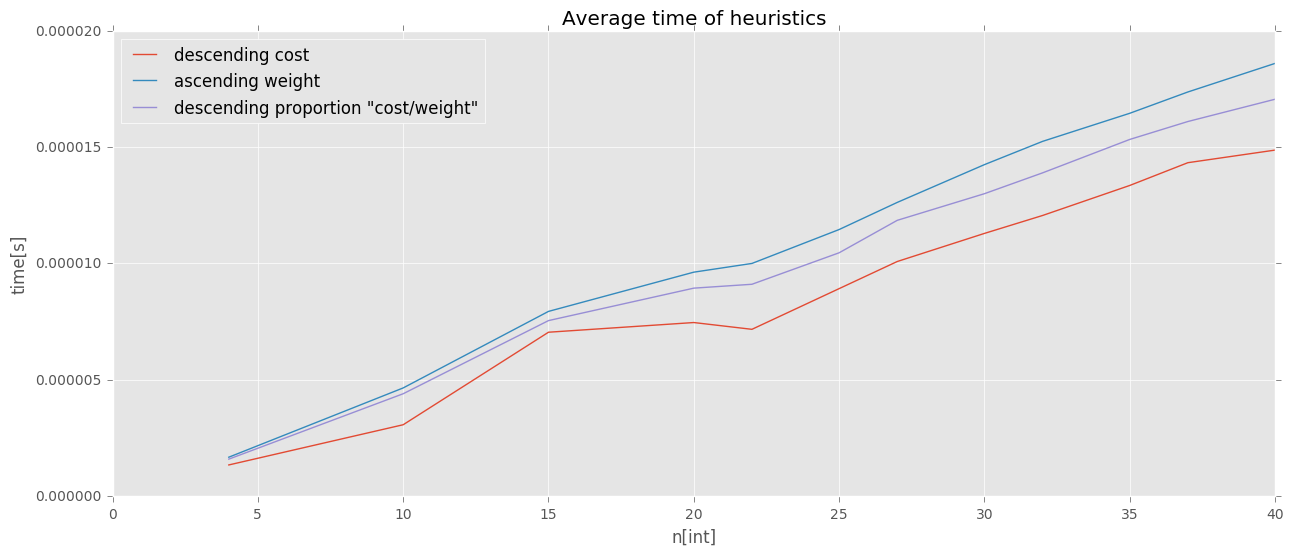

In [9]:
plt.plot(n_list, avg_by_cost_time, label='descending cost')
plt.plot(n_list, avg_by_weight_time, label='ascending weight')
plt.plot(n_list, avg_by_prop_time, label='descending proportion "cost/weight"')
plt.xlabel('n[int]')
plt.ylabel('time[s]')
plt.legend(loc='best')
plt.title('Average time of heuristics')